>> ### Correlation between news and stock movement for MSFT

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/MSFT_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,1986-03-13 00:00:00+00:00,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN
1,1986-03-14 00:00:00+00:00,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,3.571209
2,1986-03-17 00:00:00+00:00,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,1.725027
3,1986-03-18 00:00:00+00:00,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,-2.543174
4,1986-03-19 00:00:00+00:00,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,-1.739026
5,1986-03-20 00:00:00+00:00,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0,-2.654705
6,1986-03-21 00:00:00+00:00,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0,-2.727102
7,1986-03-24 00:00:00+00:00,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0,-2.803557
8,1986-03-25 00:00:00+00:00,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0,1.922949
9,1986-03-26 00:00:00+00:00,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,0.0,0.0,2.830004


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [13]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,20.549999,20.820000,20.280001,20.400000,15.139336,68219600,0.0,0.0,-2.439026
1,2009-04-29 00:00:00+00:00,0.000000,20.110001,20.889999,20.059999,20.250000,15.028007,79301600,0.0,0.0,1.605618
2,2009-05-22 00:00:00+00:00,0.000000,19.930000,20.170000,19.469999,19.750000,14.750029,37318700,0.0,0.0,-0.353177
3,2009-05-27 00:00:00+00:00,0.234091,20.250000,20.600000,20.070000,20.129999,15.033827,42892900,0.0,0.0,-1.032453
4,2009-05-29 00:00:00+00:00,0.068182,20.559999,20.940001,20.299999,20.889999,15.601420,46134900,0.0,0.0,2.151582
5,2009-06-01 00:00:00+00:00,0.000000,21.000000,21.500000,20.860001,21.400000,15.982306,57317100,0.0,0.0,2.441361
6,2009-06-02 00:00:00+00:00,0.000000,21.360001,21.980000,21.200001,21.400000,15.982306,48935700,0.0,0.0,0.000000
7,2009-06-05 00:00:00+00:00,0.083333,21.959999,22.309999,21.809999,22.139999,16.534971,59579200,0.0,0.0,1.420062
8,2009-06-08 00:00:00+00:00,0.218182,21.980000,22.320000,21.629999,22.049999,16.467747,49000600,0.0,0.0,-0.406505
9,2009-06-09 00:00:00+00:00,0.000000,22.059999,22.320000,21.879999,22.080000,16.490154,50887700,0.0,0.0,0.136058


>> #### Correlation Analysis

In [14]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: 0.04, P-value: 0.0571


>> #### Visualization

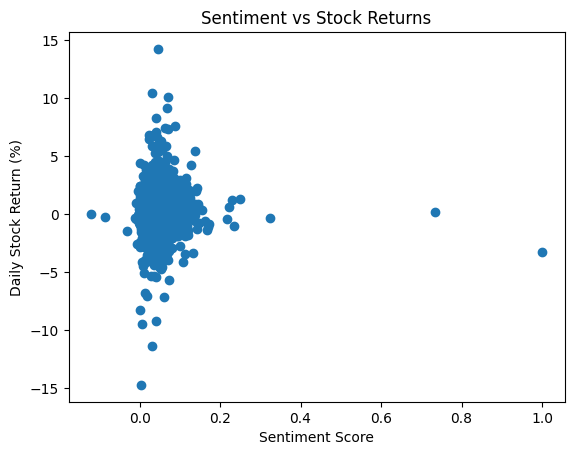

In [15]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)